In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Imagenes para el entrenamiento
trains_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/train_val',
    validation_split=0.2,
    subset = "training",
    seed=123,
    image_size=(224,224)
)
#Imagenes para la validacion
val_ds = tf.keras.utils.image_dataset_from_directory(
     '/content/drive/MyDrive/dataset/train_val',
    validation_split=0.2,
    subset = "validation",
    seed=123,
    image_size=(224,224)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/test',
    image_size=(224, 224),  # Resize images to a standard size
    batch_size=32,          # Adjust batch size as needed
    shuffle=False           # Usually shuffle is False for test sets
)

Found 10437 files belonging to 2 classes.
Using 8350 files for training.
Found 10437 files belonging to 2 classes.
Using 2087 files for validation.
Found 796 files belonging to 2 classes.


In [5]:
#Aqui podemos verificar cuales son las clases de nuestro dataset
class_names = test_ds.class_names
print(class_names)

['benign', 'malignant']


In [25]:
import tensorflow as tf

def calculate_class_distribution(dataset, class_names):
    # Extract labels from the dataset
    labels = tf.concat([y for _, y in dataset], axis=0)

    # Count occurrences of each class
    class_counts = tf.math.bincount(labels, minlength=len(class_names)).numpy()

    # Print total images and per-class distribution
    total_images = sum(class_counts)
    print(f"Total images: {total_images}")
    for idx, count in enumerate(class_counts):
        print(f"Images in class '{class_names[idx]}': {count} ({(count / total_images) * 100:.2f}%)")

In [26]:
# Example usage
class_names = ['benign', 'malignant']
calculate_class_distribution(trains_ds, class_names)

Total images: 8350
Images in class 'benign': 4392 (52.60%)
Images in class 'malignant': 3958 (47.40%)


# Cargamos los modelos

In [ ]:
carga_modelo_1 = tf.keras.models.load_model('/content/drive/MyDrive/model_1.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_1.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Esta imagen parece ser benign con un 85.03 % de exactitud.


In [ ]:
carga_modelo_2 = tf.keras.models.load_model('/content/drive/MyDrive/model_2.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/200X/SOB_M_DC-14-10926-200-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_2.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Esta imagen parece ser malignant con un 86.17 % de exactitud.


In [ ]:
carga_modelo_cancer_2 = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_2.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/malignas/SOB_M_PC-14-19440-200-006.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_cancer_2.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Esta imagen parece ser malignant con un 90.77 % de exactitud.


In [ ]:
carga_modelo_cancer_3 = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_3.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_cancer_3.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Esta imagen parece ser benign con un 97.28 % de exactitud.


In [ ]:
carga_modelo_m = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_miau_1.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_m.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Esta imagen parece ser benign con un 100.00 % de exactitud.


In [15]:
carga_modelo_m_1 = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_miau_1_da.h5')

In [16]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_m_1.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Esta imagen parece ser benign con un 100.00 % de exactitud.


In [ ]:
carga_modelo_2_c = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_2_c.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_2_c.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Esta imagen parece ser benign con un 100.00 % de exactitud.


In [12]:
carga_modelo_fina = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_fina.h5')

In [13]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_fina.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Esta imagen parece ser benign con un 100.00 % de exactitud.


In [3]:
carga_modelo_trans = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_trans.h5')

In [6]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_trans.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Esta imagen parece ser benign con un 100.00 % de exactitud.


#Pruebas modelo 1

# F1-score

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_1.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias


25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = np.argmax(predicted_labels, axis=1)

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8690909090909091


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)
print("F1-Score por clase:", f1_per_class)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8175933905752277
F1-Score por clase: [0.67605634 0.88164666]
F1-Score para la clase 'benign': 0.68
F1-Score para la clase 'malignant': 0.88


# Curva roc

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


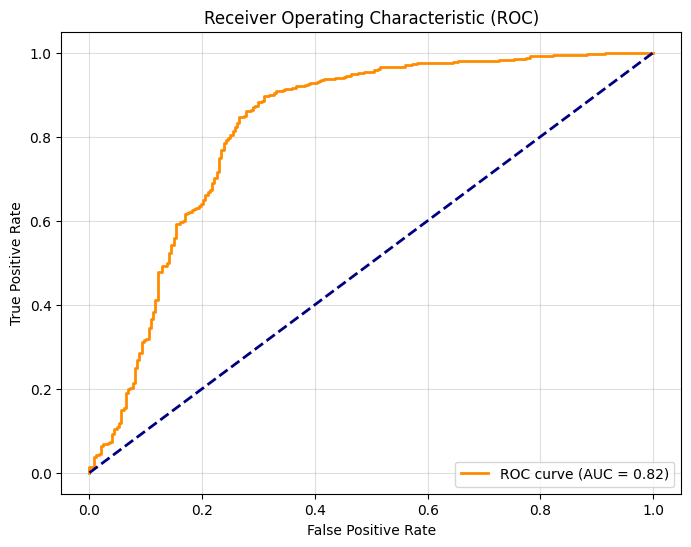

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_1.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions[:, 1])  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo 2

#F1-score

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_2.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = np.argmax(predicted_labels, axis=1)

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8874887488748875


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8282158508901982
F1-Score para la clase 'benign': 0.70
F1-Score para la clase 'malignant': 0.89


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


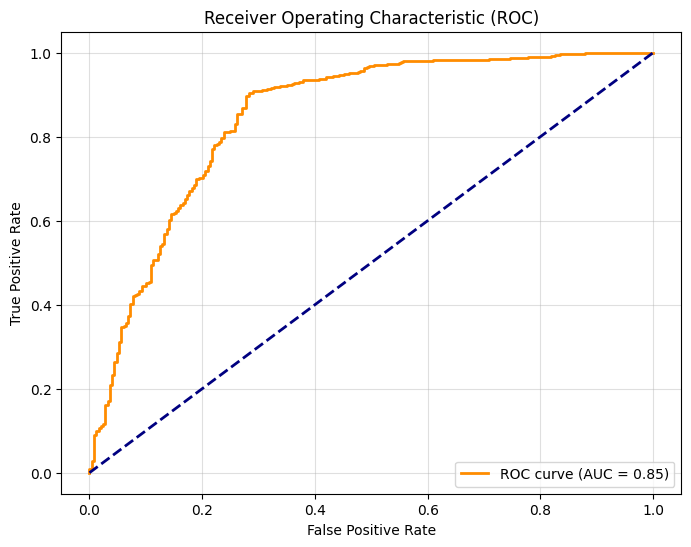

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_2.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions[:, 1])  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

# Modelos segunda parte:

#Evaluacion modelo 2


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_cancer_2.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 753ms/step


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8312756409110064
F1-Score para la clase 'benign': 0.72
F1-Score para la clase 'malignant': 0.88


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


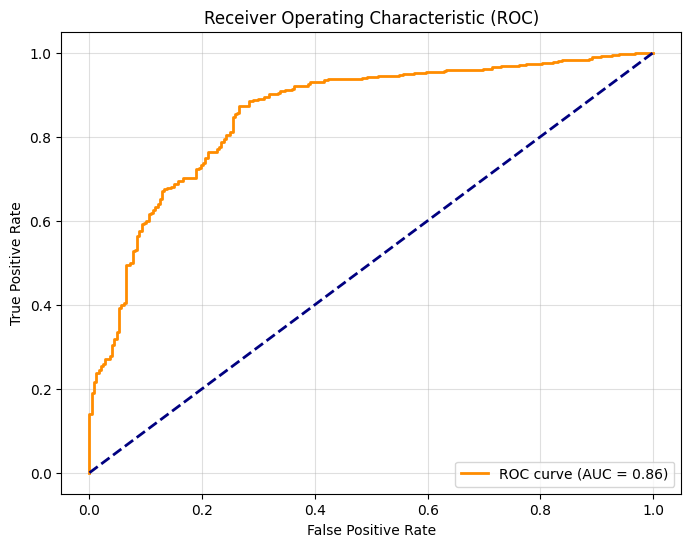

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_cancer_2.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions[:, 1])  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

# Evaluacion modelo 3

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_cancer_3.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.822925898235735
F1-Score para la clase 'benign': 0.71
F1-Score para la clase 'malignant': 0.88


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


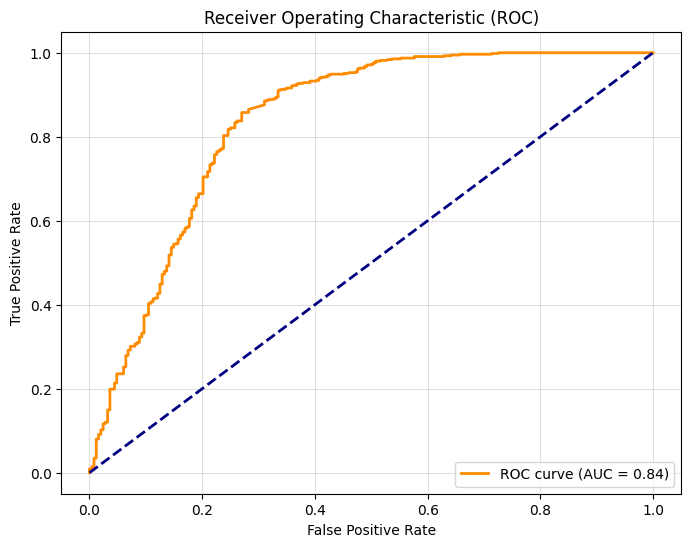

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_cancer_3.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions[:, 1])  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

# Pruebas modelo miau

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_m.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = predicted_labels

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8422818791946308


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)
#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.7449880273852484
F1-Score por clase: [0.53       0.84228188]
F1-Score para la clase 'benign': 0.53
F1-Score para la clase 'malignant': 0.84


#Curva roc

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


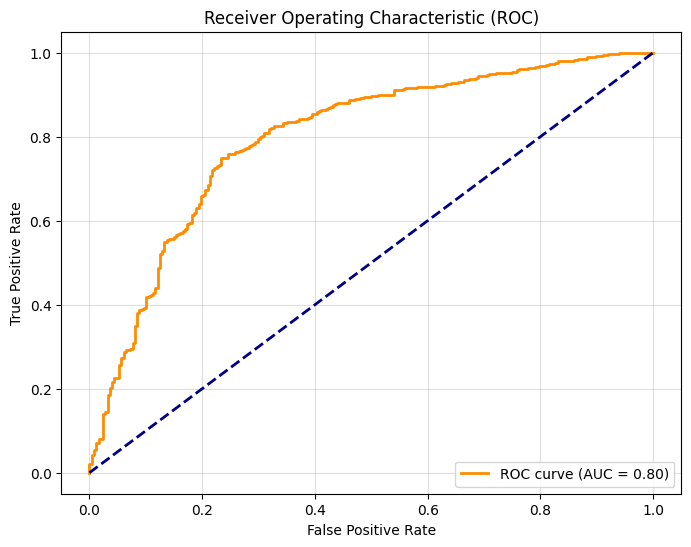

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_m.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo 2 compilado diferente

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_2_c.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 754ms/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = predicted_labels

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8485947416137806


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)
#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.7893651028653699
F1-Score por clase: [0.65848671 0.84859474]
F1-Score para la clase 'benign': 0.66
F1-Score para la clase 'malignant': 0.85


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


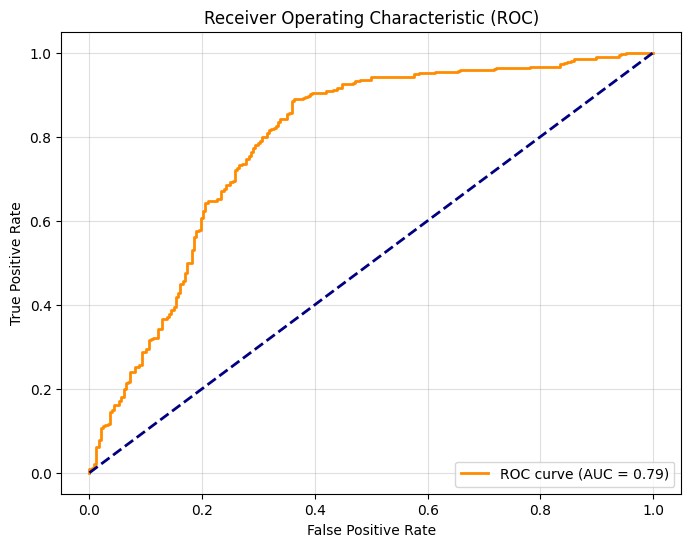

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_2_c.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo final

In [7]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_fina.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


In [88]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = predicted_labels

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8646748681898067


In [89]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)
#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.801153869033157
F1-Score por clase: [0.66079295 0.86467487]
F1-Score para la clase 'benign': 0.66
F1-Score para la clase 'malignant': 0.86


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


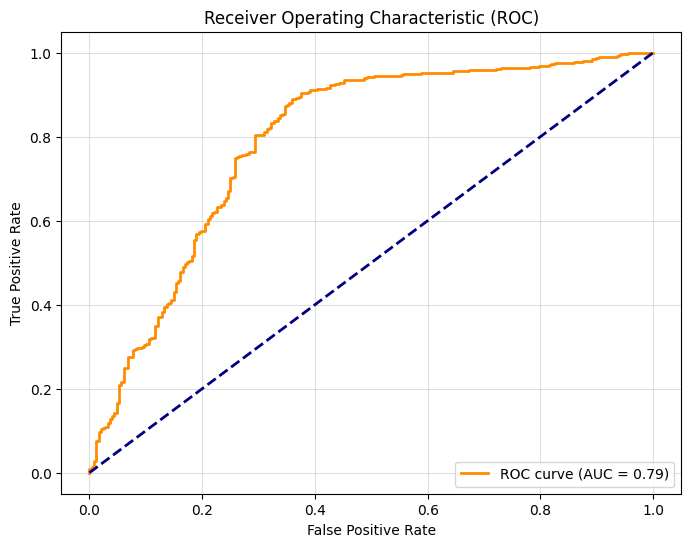

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_fina.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo con transferencia

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in test_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_trans.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)
#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8442211055276382
F1-Score por clase: [0.75       0.88686131]
F1-Score para la clase 'benign': 0.75
F1-Score para la clase 'malignant': 0.89


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


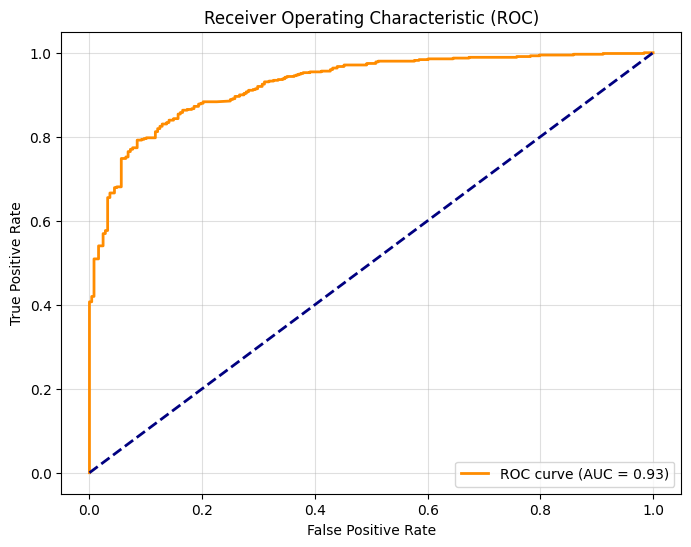

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_trans.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()